In [495]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib as plt

In [496]:
#Dados a serem analisados 
#Dados de imóveis
link = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados_casa = pd.read_csv(link)
dados_casa.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [497]:
dados_casa.sample(10)
n_casas = dados_casa["Bairro"].value_counts()
dados_casa.Metragem.median()
sum((dados_casa["Bairro"] == "Vila Mariana"))
imoveis_vilamariana = dados_casa["Bairro"] == "Vila Mariana"
imoveis_vilamariana



0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [498]:
imoveis_vl_mariana = dados_casa[imoveis_vilamariana]

In [499]:
# Média de metragem bairro Vila Mariana
imoveis_vl_mariana['Metragem'].mean()

233.6195652173913

<AxesSubplot:title={'center':'Imoveis x Bairro'}>

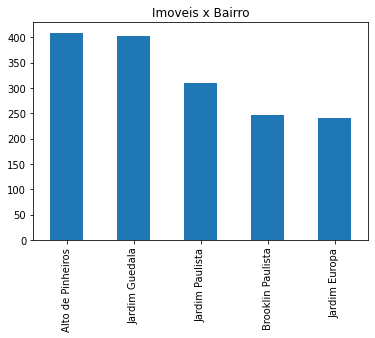

In [500]:
# Gráfico de Pizza por bairros
n_casas.head(5).plot.bar(title = "Imoveis x Bairro")

In [501]:
# Médida de metragem por bairros - Desafio 1
media = dados_casa.groupby(by="Bairro")["Metragem"]
b_media = media.mean().sort_values(ascending=False)
b_media


Bairro
Sítio Represa                         37000.000000
Vila Castelo                           2850.000000
Jardim Guedala                         2486.640199
Jardim das Camélias                    1700.000000
Chácara Flora                          1260.727273
                                          ...     
Cidade Antônio Estevão de Carvalho       57.500000
Jardim Nova Germania                     57.000000
Jardim Benfica                           48.000000
Vila Leonor                              46.000000
Vila Guaca                               10.000000
Name: Metragem, Length: 701, dtype: float64

In [502]:
# Desafio 2 - Encontre 2 formas de selecionar os dados por bairro

f1 = dados_casa["Bairro"]
f2 = dados_casa.Bairro
f3 = dados_casa.loc[lambda dados_casa: dados_casa['Bairro'] == 'Vila Leonor']


In [503]:
#Pegar outras estatísticas de dados, sum, min, max

dados_casa.head()
m_quartos = dados_casa.groupby("Bairro")['Quartos'].agg([min,max,sum])
m_quartos.sample(10)



,min,max,sum
Bairro,,,
Jardim Odete,3,3,6
Vila Marari,1,3,17
City América,2,5,57
Vila Parque Jabaquara,2,5,11
Jardim Vera Cruz(Zona Leste),3,3,6
Sacomã,2,5,53
Chácara Santo Antônio (Zona Sul),2,5,159
Ferreira,3,3,6
Rolinópolis,3,3,6


In [504]:
#Desafio 4, descobrir quais Bairros possuem rua sem nome

b_rua = dados_casa.query('Rua.isnull()')['Bairro'].value_counts()
b_rua



Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

<AxesSubplot:>

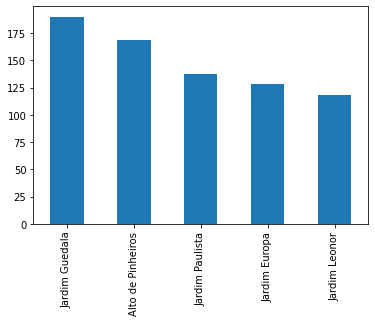

In [505]:
b_rua.head(5).plot.bar()